 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>══════════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 3. Pandas & Matplotlib**
# Homework 1. 타이타닉 데이터셋 분석하기

### _Objective_
1. *앞서 배운 Pandas와 Matplotlib을 실제 데이터셋을 처음부터 끝까지 탐색해보는 과정을 가집니다.* 


╚═══════════════════════════════════════════════╝

In [0]:
%matplotlib inline  
import matplotlib.pyplot as plt  

import pandas as pd
import numpy as np

# \[ 타이타닉 데이터셋 탐색하기\]
---

---

> * 출처 : [캐글 타이타닉 데이터셋](https://www.kaggle.com/hesh97/titanicdataset-traincsv#train.csv) <br>
> * _내용 : 타이타닉 호에 탔던 탑승객들의 생존 유무에 대한 내용_ <br>
> * _지표 : 이름, 성별, 나이, 티켓 종류 등 12컬럼 존재_ <br>

|변수명 | 변수명 설명|
|----|----|
| survival | 생존 유무(0=사망, 1=생존) |
| pclass | 탑승객 클래스(1=1st, 2=2nd, 3=3rd) |
| name | 탑승객 이름 |
| sex  | 성별 |
| age | 나이 |
| sibsp | 동승한 형제/배우자 수 |
| parch | 동승한 부모/자녀 수 |
| ticket | 티켓 번호 |
| fare   | 운임비 |
| cabin | 선실 |
| embarked | 승선한 항구 이름 (C=Cherbourg; Q=Queenstown; S=southampton) |


## (1)  Pandas를 통해 데이터 읽어오기

In [9]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/titanic_dataset.csv
df = pd.read_csv("./titanic_dataset.csv")

--2019-04-17 02:48:36--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/titanic_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.65
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_dataset.csv.2’

titanic_dataset.csv 100%[===================>]  59.76K   249KB/s    in 0.2s    

2019-04-17 02:48:36 (249 KB/s) - ‘titanic_dataset.csv.2’ saved [61194/61194]



In [102]:
df

컬럼 이름,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## (2) 각 열 별로 얼마나 결측(missing value)되어 있는지 확인하기

현재 타이타닉 생존 데이터셋에는 일부 값들이 결측되어 있다. 각 Feature(열) 별로 몇 개가 결측되어 있는지를 확인해보자.

In [79]:
# 정답을 입력해 주세요!
new_df = pd.DataFrame(data = (df.isnull() == True).sum())
new_df = new_df.T
new_df.columns = df.columns
new_df.columns.name = '컬럼 이름'
new_df.index = ['결측 갯수']
new_df

컬럼 이름,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
결측 갯수,0,0,0,0,0,177,0,0,0,0,687,2


정답은 아래와 같습니다. 데이터프레임으로 가져와 주세요!

| 컬럼이름 |PassenegerId| Survived | Pclass | Name | Sex | Age | SibSp | Parch | Ticket | Fare | Cabin | Embarked |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 결측 갯수 | 0 | 0 | 0 | 0 | 0 | 177 | 0 | 0 | 0 | 0 | 687 | 2 |

## (2) 생존자 수 확인

데이터 내에 몇 명이 생존했고, 몇 명이 사망했는지를 확인해보자.

In [24]:
# 정답을 입력해 주세요!
# 사망
dieCount = df[[df.loc[:, "Survived"] == 0][0]]["Survived"].count()
# 생존
survivedCount = df[[df.loc[:, "Survived"] == 1][0]]["Survived"].count()

new_df = pd.DataFrame([["사망", dieCount], ["생존", survivedCount]])
new_df.columns = ["생존 유무", "값"]
new_df


,생존 유무,값
0,사망,549
1,생존,342


정답은 아래와 같습니다. 데이터프레임으로 가져와 주세요!

| 생존 유무 | 값 |
| ------- | --- |
|  사망 | 549 |
| 생존 | 342 |

## (3) 연령 추론

타이타닉 내 승객 이름에는 Title이 들어갑니다. 나이 정보가 없을 경우, 이 Title에 따라 대략적인 나이를 추론할 수 있습니다. 이번에는 각 `Name` 컬럼에서 Title을 추출 후, Title 별로 평균 나이가 어떻게 되는지 확인해 주세요.

| default Title | 의미 |
| ---- | ---- |
| Mr   | Adult man (regardless of marital status) |
| Mrs  | Adult woman (usually just for married women, widows, and divorcees) |
| Ms | Adult woman (regardless of marital status) |
| Miss | Formal title for unmarried women and for female children |
| Master | For male children: Young boys were formerly addressed as "Master [first name]." This was the standard form for servants to use in addressing their employer's minor sons. It is also the courtesy title for the eldest son of a Scottish laird. |
| Maid | Archaic: When used as a title before a name (and not as a general term for a young domestic worker housemaid girl), this was a way to denote an unmarried woman, such as the character Maid Marian. |
| Madam | Adult Woman |
| Don | master of a household |
| Rev | Reverend |
| Dr | Docter |
| Capt | Captain |

In [25]:
# 정답을 입력해 주세요!
# Mr에 Mrs도 포함되는 것 어떻게?
# Title Type 없음 어떻게?
titles = ["Mr", "Mrs", "Ms", "Miss", "Master", "Maid", "Madam", "Don", "Rev", "Dr", "Capt"]
age = []
for title in titles:
    title_result = [title in names for names in df.loc[:,"Name"]]
    age.append(df[title_result].loc[:, "Age"].mean())

age_df = pd.DataFrame(age)
age_df.index = titles
age_df.T

,Mr,Mrs,Ms,Miss,Master,Maid,Madam,Don,Rev,Dr,Capt
0,33.118395,35.642857,28.0,21.773973,4.574167,41.0,NaN,45.0,43.166667,39.444444,70.0


정답은 아래와 같습니다. 데이터프레임으로 가져와 주세요!

| Title Type | 없음 | capt | don | dr | maid | master | miss | mr | mrs | ms | rev |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 평균 연령  | 41.5 | 70 | 40 | 42 | 41 | 4.57| 21.77 | 32.43 | 35.69 | 33.19 | 43.17 |

## (4) 나이 분포도 확인

탑승객들의 나이가 어떤식으로 분포되어 있는지 확인해보자. 

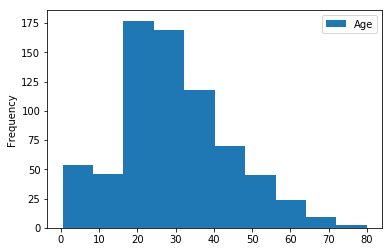

In [0]:
df.plot(y='Age',kind='hist')

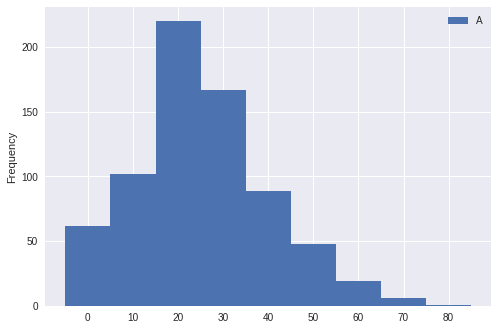

In [155]:
# 정답을 입력해 주세요!
new_df = df["Age"]
age_list = []
for age in np.arange(0, 90, 10):
    age_list.append(new_df[(new_df >= age) & (new_df < age + 10)].count())
plt.bar(x = np.arange(0, 90, 10), height = age_list, width = 10)
plt.ylabel("Frequency")
plt.legend("Age")
plt.xticks(np.arange(0, 90, 10))
plt.show()

분포도는 아래와 같습니다. matplotlib과 pandas를 이용해 시각화해주세요!

![Imgur](https://i.imgur.com/jM0GcWy.png)

## (5) 성별에 따른 생존율 비교

타이타닉 영화에서처럼, 실제로 승객들이 여성을 우선 생존시키려고 하는지 확인해 보자.

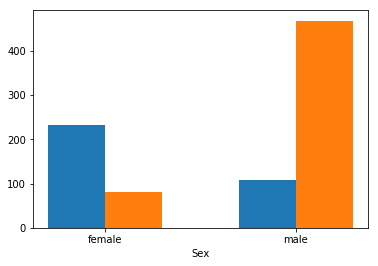

In [85]:
# 정답을 입력해주세요
survived_df = df[df["Survived"] == 1].groupby(["Sex"])
survived_count = survived_df["Survived"].count() 
dead_df = df[df["Survived"] == 0].groupby(["Sex"])
dead_count = dead_df["Survived"].count()
xs = np.arange(0, 2)
plt.bar(x = xs - 0.15,  height = survived_count, width = 0.3)
plt.bar(x = xs + 0.15, height = dead_count, width = 0.3)
plt.xlabel("Sex")
plt.xticks(np.arange(0, 2), ["female", "male"])
plt.legend = ["(PassengerId, Alive)", "(PassengerId, dead)"]
plt.show()



# new_df = df.groupby(["Sex", "Survived"])
# new_count = new_df["PassengerId"].count() --> 여기서 각 각의 값을 어떻게 빼는 지?

남녀에 따른 생존 사망 숫자는 아래와 같습니다.

|     | 생존 | 사망 |
| --- | --- | --- |
| 여자 | 233 | 81  |
| 남자 | 109 | 468 |


아래와 같이 바 그래프로 비교해주세요
![Imgur](https://i.imgur.com/1DurUcW.png)

## (6) 연령에 따른 생존율 비교

10대, 20대, 30대 등 연령 대별로 생존율이 어떻게 달라지는 지 확인해보자. 

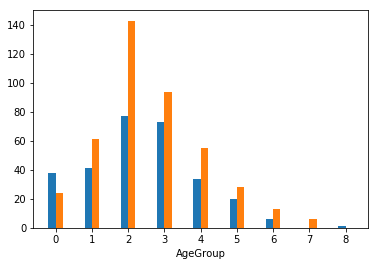

In [102]:
# 정답을 입력해 주세요!
# legend 추가
survived_df = df[df["Survived"] == 1]
dead_df = df[df["Survived"] == 0]

survived_count = []
dead_count = []
for age in np.arange(0., 90., 10.):
    survived_count.append(survived_df[(survived_df["Age"] >= age) & (survived_df["Age"] < age + 10)].loc[:, "Survived"].count())
    dead_count.append(dead_df[(dead_df["Age"] >= age) & (dead_df["Age"] < age + 10)].loc[:, "Survived"].count())

plt.bar(x = np.arange(0, 90, 10) - 1, height = survived_count, width = 2)
plt.bar(x = np.arange(0, 90, 10) + 1, height = dead_count, width = 2)
plt.xticks(np.arange(0, 90, 10), np.arange(0, 9))
plt.xlabel("AgeGroup")
plt.show()

연령대별 생존자수와 사망자수는 아래와 같습니다.

|연령대|생존자수|사망자수|
|---|---|---|
|10대미만|38|24|
|10대|41|61|
|20대|77|143|
|30대|73|94|
|40대|34|55|
|50대|20|28|
|60대|6 |13|
|70대|0 |6|
|80대|1 |0|

아래와 같이 바그래프로 나타내주세요.
![Imgur](https://i.imgur.com/VP6gsLH.png)

## (7) 각 Feature 간 상관계수 구하고, 생존에 가장 직결된 요소 파악하기

피어슨 상관계수는 두 변수 간에 어떤 관계를 갖고 있는지를 분석하는 방법입니다. 강한 선형관계를 가질수록 1 혹은 -1로 치중되고, 아니면 0에 수렴됩니다. 높은 상관계수를 가지는 요소를 파악해봅시다.

* hint 1) 상관계수 구하기
  `df.corr()`을 통해 쉽게 변수 간 상관관계를 구할 수 있습니다.
  
* hint 2) heatmap 그리기
````python
import seaborn as sns
sns.heatmap(<dataframe>, annot=True, cbar=True)
````
를 통해 쉽게 heatmap을 구할 수 있습니다.

In [105]:
# 정답을 입력해 주세요
# 색 바꾸기
import seaborn as sns
cor = df.corr()
cor
sns.heatmap(cor, annot= True, cbar = True)


ModuleNotFoundError: ignored

아래와 같은 heatmap을 그려주세요!

![Imgur](https://i.imgur.com/2VPqxmV.png)

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/04

---